In [1]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow as imshow
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def otsu_binarize(img):           # takes a gray scale img and returns a binarized img
  gray_hist = cv2.calcHist([img], [0], None, [256], [0,256])
  p = gray_hist / np.sum(gray_hist)
  s_b_ks = 0
  opt_k = 0   # optimal k value
  for k in range(1,len(p)):
    a = []
    for i in range(0,k):
      a.append(p[i])
    wo = np.sum(a)
    w1 = 1 - wo

    a = []
    for i in range(0,k):
      a.append((i+1)*p[i])
    mewK = np.sum(a)

    a = []
    for i in range(len(p)):
      a.append((i+1)*p[i])
    mewT = np.sum(a)

    s_b_k = (((mewT * wo) - mewK) ** 2 ) / (wo * w1)
    if s_b_ks < s_b_k:
      s_b_ks = s_b_k
      opt_k = k
  bin = img.copy()
  bin[img > opt_k] = 255  # replaces all value of pixels, where the value is greater than the optimal threshold value, to 255
  bin[img <= opt_k] = 0    # replaces all value of pixels, where the value is less than or equal to the optimal threshold value, to 255
  return bin 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 31090  100 31090    0     0   309k      0 --:--:-- --:--:-- --:--:--  309k

					 Original Image


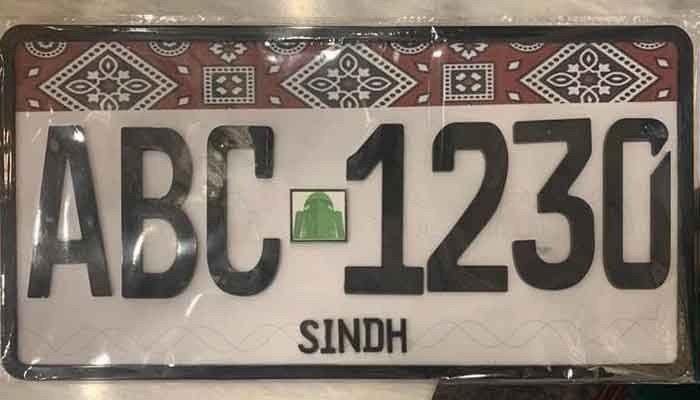


					 Grayscale Image


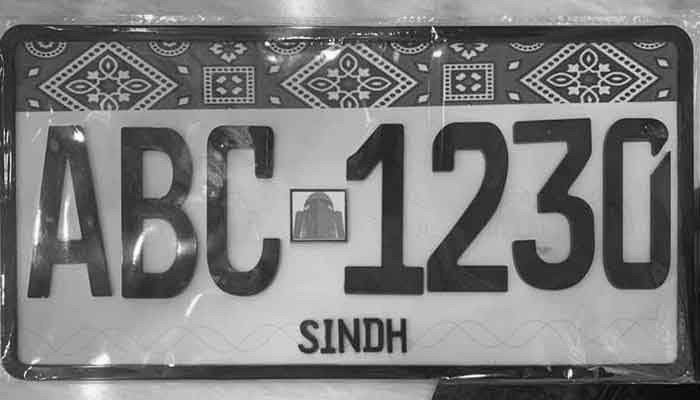

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars



					 Binarized Image


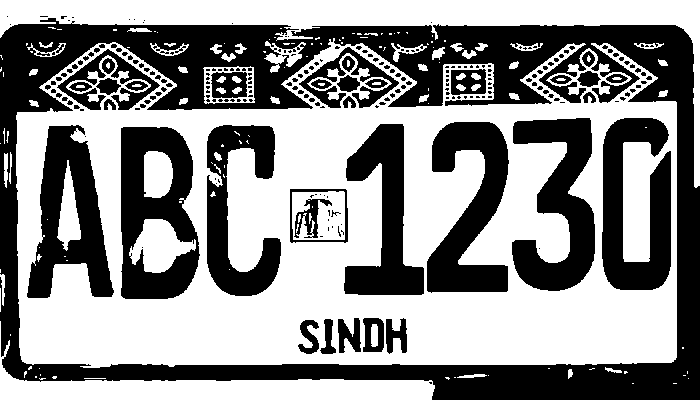

In [3]:
!curl -o nplate.jpg https://www.thenews.com.pk/assets/uploads/updates/2020-07-22/690451_095020_updates.jpg
a = cv2.imread('nplate.jpg')  # reading the image
print("\n\t\t\t\t\t Original Image")
imshow(a)
g = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)   # converting BGR img to gray scale
print("\n\t\t\t\t\t Grayscale Image")
imshow(g)
otsu_bin = otsu_binarize(g)   # passing gray scale img to the func which returns the binarized img
print("\n\t\t\t\t\t Binarized Image")
imshow(otsu_bin)